1. Import pandas under the name pd.

In [2]:
import pandas as pd

2.Print the version of pandas that has been imported.

In [117]:
print(pd.__version__)

0.17.1


3.Print out all the version information of the libraries that are required by the pandas library.

In [118]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.5.1.final.0
python-bits: 64
OS: Windows
OS-release: 7
machine: AMD64
processor: Intel64 Family 6 Model 42 Stepping 7, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None

pandas: 0.17.1
nose: 1.3.7
pip: 10.0.1
setuptools: 18.5
Cython: 0.23.4
numpy: 1.10.1
scipy: 0.16.0
statsmodels: 0.6.1
IPython: 4.0.1
sphinx: 1.3.1
patsy: 0.4.0
dateutil: 2.4.2
pytz: 2015.7
blosc: None
bottleneck: 1.0.0
tables: 3.2.2
numexpr: 2.4.4
matplotlib: 1.5.0
openpyxl: 2.2.6
xlrd: 0.9.4
xlwt: 1.0.0
xlsxwriter: 0.7.7
lxml: 3.4.4
bs4: 4.4.1
html5lib: None
httplib2: None
apiclient: None
sqlalchemy: 1.0.9
pymysql: None
psycopg2: None
Jinja2: 2.8


4.Create a DataFrame df from this dictionary data which has the index labels.

In [144]:
import numpy as np
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index = labels)
df

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,2.0,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


5.Display a summary of the basic information about this DataFrame and its data.

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
age         8 non-null float64
animal      10 non-null object
priority    10 non-null object
visits      10 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


In [121]:
df.describe()

,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


6.Return the first 3 rows of the DataFrame df.

In [122]:
df.head(3)

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2


7.Select just the 'animal' and 'age' columns from the DataFrame df.

In [123]:
df[["animal", "age"]]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


8.Select the data in rows [3, 4, 8] and in columns ['animal', 'age'].

In [124]:
df.loc[df.index[[3,4,8]], ['animal', 'age']]

,animal,age
d,dog,NaN
e,dog,5
i,dog,7


9.Select only the rows where the number of visits is greater than 3.

In [125]:
df[df['visits'] > 3]

,age,animal,priority,visits


10.Select the rows where the age is missing, i.e. is NaN.

In [126]:
df[df['age'].isnull()]

,age,animal,priority,visits
d,NaN,dog,yes,3
h,NaN,cat,yes,1


11.Select the rows where the animal is a cat and the age is less than 3.

In [127]:
df[(df['age'] < 3) & (df["animal"] == "cat")] 

,age,animal,priority,visits
a,2.5,cat,yes,1
f,2.0,cat,no,3


12.Select the rows the age is between 2 and 4 (inclusive).

In [128]:
df[(df["age"] >= 2) & (df["age"] <= 4)]

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
f,2.0,cat,no,3
j,3.0,dog,no,1


or

In [129]:
df[df['age'].between(2, 4)]

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
f,2.0,cat,no,3
j,3.0,dog,no,1


13.Change the age in row 'f' to 1.5.

In [130]:
df.loc["f", "age"] = 1.5 
df

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,1.5,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


14.Calculate the sum of all visits (the total number of visits).

In [131]:
df["visits"].sum()

19

15.Calculate the mean age for each different animal in df.

In [132]:
df.groupby('animal')["age"].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

16.Append a new row 'k' to df with your choice of values for each column. Then delete that row to return the original DataFrame.

In [133]:
df["k"] = df.loc[df.index[4],"visits"]
df

,age,animal,priority,visits,k
a,2.5,cat,yes,1,2
b,3.0,cat,yes,3,2
c,0.5,snake,no,2,2
d,NaN,dog,yes,3,2
e,5.0,dog,no,2,2
f,1.5,cat,no,3,2
g,4.5,snake,no,1,2
h,NaN,cat,yes,1,2
i,7.0,dog,no,2,2
j,3.0,dog,no,1,2


In [134]:
del df["k"]
df

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,1.5,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


17.Count the number of each type of animal in df.

In [135]:
df['animal'].value_counts()

cat      4
dog      4
snake    2
Name: animal, dtype: int64

18.Sort df first by the values in the 'age' in decending order, then by the value in the 'visit' column in ascending order.

In [140]:
df.sort_values(by=['age', 'visits'], ascending=[False, True])

,age,animal,priority,visits
i,7.0,dog,no,2
e,5.0,dog,no,2
g,4.5,snake,no,1
j,3.0,dog,no,1
b,3.0,cat,yes,3
a,2.5,cat,yes,1
f,2.0,cat,no,3
c,0.5,snake,no,2
h,NaN,cat,yes,1
d,NaN,dog,yes,3


19.The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be True and 'no' should be False.

In [137]:
df['priority'] = df['priority'].map({'yes': True, 'no': False})
df

,age,animal,priority,visits
a,2.5,cat,True,1
b,3.0,cat,True,3
c,0.5,snake,False,2
d,NaN,dog,True,3
e,5.0,dog,False,2
f,1.5,cat,False,3
g,4.5,snake,False,1
h,NaN,cat,True,1
i,7.0,dog,False,2
j,3.0,dog,False,1


20.In the 'animal' column, change the 'snake' entries to 'python'.

In [146]:
df['animal'] = df['animal'].replace('snake', "python")
df

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,python,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,2.0,cat,no,3
g,4.5,python,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


21.For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).

In [147]:
df.pivot_table(index='animal', columns='visits', values='age', aggfunc='mean')

visits,1,2,3
animal,,,
cat,2.5,NaN,2.5
dog,3.0,6.0,NaN
python,4.5,0.5,NaN


22.You have a DataFrame df with a column 'A' of integers. For example:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
How do you filter out rows which contain the same integer as the row immediately above? // слепить строки(!)

In [151]:
df1 = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
df1

,A
0,1
1,2
2,2
3,3
4,4
5,5
6,5
7,5
8,6
9,7


In [154]:
df1.drop_duplicates(subset='A')

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


23.Given a DataFrame of numeric values, say
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
how do you subtract the row mean from each element in the row?

In [172]:
import numpy as np
df2 = pd.DataFrame(np.random.random(size=(5, 3)))
df2.head()

,0,1,2
0,0.443527,0.281753,0.637795
1,0.241324,0.406699,0.521277
2,0.688810,0.019052,0.649581
3,0.595025,0.040051,0.589568
4,0.543967,0.859713,0.110030


In [173]:
df2.sub(df2.mean(axis=1), axis=0)

,0,1,2
0,-0.010831,-0.172605,0.183436
1,-0.148443,0.016933,0.131510
2,0.236329,-0.433429,0.197100
3,0.186810,-0.368164,0.181353
4,0.039397,0.355143,-0.394540


24.Suppose you have DataFrame with 10 columns of real numbers, for example:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
Which column of numbers has the smallest sum? (Find that column's label.)

In [195]:
df3 = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
df3

,a,b,c,d,e,f,g,h,i,j
0,0.928630,0.819217,0.428988,0.197497,0.958741,0.794101,0.405633,0.888231,0.169986,0.056045
1,0.667089,0.138561,0.515591,0.025979,0.464729,0.836889,0.776501,0.772615,0.683473,0.668080
2,0.873761,0.003018,0.268237,0.226602,0.686323,0.452032,0.927758,0.824015,0.674541,0.559114
3,0.250808,0.233744,0.024017,0.058517,0.073438,0.542509,0.947492,0.230081,0.037715,0.842380
4,0.071836,0.675903,0.765256,0.550710,0.159670,0.179235,0.001693,0.065131,0.761164,0.411450


In [196]:
df3.sum().idxmin()

'd'

25.How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)?

In [197]:
len(df3.drop_duplicates(keep=False))

5

26.You have a DataFrame that consists of 10 columns of floating--point numbers. Suppose that exactly 5 entries in each row are NaN values. For each row of the DataFrame, find the column which contains the third NaN value.

(You should return a Series of column labels.)

In [198]:
(df3.isnull().cumsum(axis=1) == 3).idxmax(axis=1)

0    a
1    a
2    a
3    a
4    a
dtype: object

27.A DataFrame has a column of groups 'grps' and and column of numbers 'vals'. For example:

df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
For each group, find the sum of the three greatest values.

In [199]:
df4 = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
df4

,grps,vals
0,a,12
1,a,345
2,a,3
3,b,1
4,b,45
5,c,14
6,a,4
7,a,52
8,b,54
9,c,23


In [201]:
df4.groupby('grps')['vals'].nlargest(3).sum(level=0)

grps
a    409
b    156
c    345
dtype: int64

28.A DataFrame has two integer columns 'A' and 'B'. The values in 'A' are between 1 and 100 (inclusive). For each group of 10 consecutive integers in 'A' (i.e. (0, 10], (10, 20], ...), calculate the sum of the corresponding values in column 'B'.

29.

30.

31.

32.

33.Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers. Let's call this Series s.

In [204]:
DatetimeIndex = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B') 
DatetimeIndex

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2015-12-18', '2015-12-21', '2015-12-22', '2015-12-23',
               '2015-12-24', '2015-12-25', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', length=261, freq='B')

In [205]:
s = pd.Series(np.random.rand(len(DatetimeIndex)), index=DatetimeIndex)
s

2015-01-01    0.725586
2015-01-02    0.081676
2015-01-05    0.122790
2015-01-06    0.630190
2015-01-07    0.481154
2015-01-08    0.040595
2015-01-09    0.833721
2015-01-12    0.130160
2015-01-13    0.426779
2015-01-14    0.289903
2015-01-15    0.272453
2015-01-16    0.968728
2015-01-19    0.521826
2015-01-20    0.829817
2015-01-21    0.342000
2015-01-22    0.792871
2015-01-23    0.923608
2015-01-26    0.363944
2015-01-27    0.694782
2015-01-28    0.829268
2015-01-29    0.027535
2015-01-30    0.916145
2015-02-02    0.221511
2015-02-03    0.301557
2015-02-04    0.308054
2015-02-05    0.390237
2015-02-06    0.165568
2015-02-09    0.471243
2015-02-10    0.051871
2015-02-11    0.163094
                ...   
2015-11-20    0.254535
2015-11-23    0.315605
2015-11-24    0.274382
2015-11-25    0.811004
2015-11-26    0.535817
2015-11-27    0.735451
2015-11-30    0.152039
2015-12-01    0.246619
2015-12-02    0.955229
2015-12-03    0.546529
2015-12-04    0.151548
2015-12-07    0.112940
2015-12-08 

34.Find the sum of the values in s for every Wednesday.

In [70]:
s[s.index.weekday == 2].sum()

24.32774920103226

35.For each calendar month in s, find the mean of values.

In [85]:
s.groupby(pd.TimeGrouper('12M')).resample("D").mean()

0.49656954864765934

36.For each group of four consecutive calendar months in s, find the date on which the highest value occurred.

In [77]:
s.groupby(pd.TimeGrouper('4M')).idxmax()

2015-01-31   2015-01-23
2015-05-31   2015-03-10
2015-09-30   2015-08-27
2016-01-31   2015-11-06
dtype: datetime64[ns]

37.Create a DateTimeIndex consisting of the third Thursday in each month for the years 2015 and 2016.

In [86]:
pd.date_range('2015-01-01', '2016-12-31', freq='WOM-3THU')

DatetimeIndex(['2015-01-15', '2015-02-19', '2015-03-19', '2015-04-16',
               '2015-05-21', '2015-06-18', '2015-07-16', '2015-08-20',
               '2015-09-17', '2015-10-15', '2015-11-19', '2015-12-17',
               '2016-01-21', '2016-02-18', '2016-03-17', '2016-04-21',
               '2016-05-19', '2016-06-16', '2016-07-21', '2016-08-18',
               '2016-09-15', '2016-10-20', '2016-11-17', '2016-12-15'],
              dtype='datetime64[ns]', freq='WOM-3THU')

38.Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).

In [60]:
import numpy as np
df5 = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045.0, np.nan, 10065.0, np.nan, 10085.0],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df5

,Airline,FlightNumber,From_To,RecentDelays
0,KLM(!),10045,LoNDon_paris,"[23, 47]"
1,<Air France> (12),NaN,MAdrid_miLAN,[]
2,(British Airways. ),10065,londON_StockhOlm,"[24, 43, 87]"
3,12. Air France,NaN,Budapest_PaRis,[13]
4,"""Swiss Air""",10085,Brussels_londOn,"[67, 32]"


In [22]:
df5['FlightNumber' ] = df5['FlightNumber'].interpolate().astype(int)
df5

,Airline,FlightNumber,From_To,RecentDelays
0,KLM(!),10045,LoNDon_paris,"[23, 47]"
1,<Air France> (12),10055,MAdrid_miLAN,[]
2,(British Airways. ),10065,londON_StockhOlm,"[24, 43, 87]"
3,12. Air France,10075,Budapest_PaRis,[13]
4,"""Swiss Air""",10085,Brussels_londOn,"[67, 32]"


39.The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame.

In [23]:
temp = df5.From_To.str.split('_', expand=True)
temp.columns = ['From', 'To']
temp

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


40.Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [24]:
temp['From'] = temp['From'].str.capitalize()
temp['To'] = temp['To'].str.capitalize()
temp

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


41.Delete the From_To column from df and attach the temporary DataFrame from the previous questions.

In [48]:
del df5["From_To"]
df5 = df5.join(temp)
df5

,Airline,FlightNumber,RecentDelays,From,To
0,KLM(!),10045,"[23, 47]",London,Paris
1,<Air France> (12),NaN,[],Madrid,Milan
2,(British Airways. ),10065,"[24, 43, 87]",London,Stockholm
3,12. Air France,NaN,[13],Budapest,Paris
4,"""Swiss Air""",10085,"[67, 32]",Brussels,London


42.In the Airline column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. '(British Airways. )' should become 'British Airways'.

In [52]:
df5['Airline'] = df5['Airline'].str.extract('([a-zA-Z\s]+)').str.strip()
df5

,Airline,FlightNumber,From_To,RecentDelays
0,KLM,10045,LoNDon_paris,"[23, 47]"
1,Air France,NaN,MAdrid_miLAN,[]
2,British Airways,10065,londON_StockhOlm,"[24, 43, 87]"
3,Air France,NaN,Budapest_PaRis,[13]
4,Swiss Air,10085,Brussels_londOn,"[67, 32]"


43.In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.
Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

In [61]:
delays = df5['RecentDelays'].apply(pd.Series)
delays

,0,1,2
0,23,47,NaN
1,NaN,NaN,NaN
2,24,43,87
3,13,NaN,NaN
4,67,32,NaN


In [62]:
delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]
delays

,delay_1,delay_2,delay_3
0,23,47,NaN
1,NaN,NaN,NaN
2,24,43,87
3,13,NaN,NaN
4,67,32,NaN


In [63]:
df5 = df5.drop('RecentDelays', axis=1).join(delays)
df5

,Airline,FlightNumber,From_To,delay_1,delay_2,delay_3
0,KLM(!),10045,LoNDon_paris,23,47,NaN
1,<Air France> (12),NaN,MAdrid_miLAN,NaN,NaN,NaN
2,(British Airways. ),10065,londON_StockhOlm,24,43,87
3,12. Air France,NaN,Budapest_PaRis,13,NaN,NaN
4,"""Swiss Air""",10085,Brussels_londOn,67,32,NaN


44.Given the lists letters = ['A', 'B', 'C'] and numbers = list(range(10)), construct a MultiIndex object from the product of the two lists. Use it to index a Series of random numbers. Call this Series s.

In [89]:
letters = ['A', 'B', 'C']
numbers = list(range(10))
mi = pd.MultiIndex.from_product([letters, numbers])
mi

MultiIndex(levels=[['A', 'B', 'C'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [91]:
s = pd.Series(np.random.rand(30), index=mi)
s

A  0    0.072458
   1    0.592321
   2    0.303408
   3    0.844640
   4    0.213370
   5    0.527839
   6    0.052306
   7    0.383690
   8    0.022760
   9    0.056338
B  0    0.270289
   1    0.638204
   2    0.956075
   3    0.700157
   4    0.112033
   5    0.829352
   6    0.015298
   7    0.378733
   8    0.643756
   9    0.057431
C  0    0.491353
   1    0.297349
   2    0.387157
   3    0.270424
   4    0.431413
   5    0.462575
   6    0.647131
   7    0.786776
   8    0.234270
   9    0.736998
dtype: float64

45.Check the index of s is lexicographically sorted (this is a necessary proprty for indexing to work correctly with a MultiIndex).

In [92]:
s.index.is_lexsorted()

True

46.Select the labels 1, 3 and 6 from the second level of the MultiIndexed Series.

In [113]:
s.loc[:, [1, 3, 6]]

A  1    0.592321
   3    0.844640
   6    0.052306
B  1    0.638204
   3    0.700157
   6    0.015298
C  1    0.297349
   3    0.270424
   6    0.647131
dtype: float64

47.Slice the Series s; slice up to label 'B' for the first level and from label 5 onwards for the second level.

In [115]:
s.loc[slice(None, 'B'), slice(5, None)]

A  5    0.527839
   6    0.052306
   7    0.383690
   8    0.022760
   9    0.056338
B  5    0.829352
   6    0.015298
   7    0.378733
   8    0.643756
   9    0.057431
dtype: float64

48.Sum the values in s for each label in the first level (you should have Series giving you a total for labels A, B and C).

In [116]:
s.sum(level=0)

A    3.069131
B    4.601328
C    4.745446
dtype: float64

49.Suppose that sum() (and other methods) did not accept a level keyword argument. How else could you perform the equivalent of s.sum(level=1)?

In [117]:
s.unstack().sum(axis=0)

0    0.834099
1    1.527874
2    1.646640
3    1.815221
4    0.756816
5    1.819767
6    0.714735
7    1.549199
8    0.900786
9    0.850768
dtype: float64

In [118]:
s.sum(level=1)

0    0.834099
1    1.527874
2    1.646640
3    1.815221
4    0.756816
5    1.819767
6    0.714735
7    1.549199
8    0.900786
9    0.850768
dtype: float64

50.Exchange the levels of the MultiIndex so we have an index of the form (letters, numbers). Is this new Series properly lexsorted? If not, sort it.

In [122]:
s1 = s.swaplevel(0, 1)
s1

0  A    0.072458
1  A    0.592321
2  A    0.303408
3  A    0.844640
4  A    0.213370
5  A    0.527839
6  A    0.052306
7  A    0.383690
8  A    0.022760
9  A    0.056338
0  B    0.270289
1  B    0.638204
2  B    0.956075
3  B    0.700157
4  B    0.112033
5  B    0.829352
6  B    0.015298
7  B    0.378733
8  B    0.643756
9  B    0.057431
0  C    0.491353
1  C    0.297349
2  C    0.387157
3  C    0.270424
4  C    0.431413
5  C    0.462575
6  C    0.647131
7  C    0.786776
8  C    0.234270
9  C    0.736998
dtype: float64

In [123]:
s1.index.is_lexsorted()


False

In [124]:
s1 = s1.sort_index()
s1

0  A    0.072458
   B    0.270289
   C    0.491353
1  A    0.592321
   B    0.638204
   C    0.297349
2  A    0.303408
   B    0.956075
   C    0.387157
3  A    0.844640
   B    0.700157
   C    0.270424
4  A    0.213370
   B    0.112033
   C    0.431413
5  A    0.527839
   B    0.829352
   C    0.462575
6  A    0.052306
   B    0.015298
   C    0.647131
7  A    0.383690
   B    0.378733
   C    0.786776
8  A    0.022760
   B    0.643756
   C    0.234270
9  A    0.056338
   B    0.057431
   C    0.736998
dtype: float64

51.Let's suppose we're playing Minesweeper on a 5 by 4 grid, i.e.
X = 5
Y = 4
To begin, generate a DataFrame df with two columns, 'x' and 'y' containing every coordinate for this grid. That is, the DataFrame should start:
   x  y
0  0  0
1  0  1
2  0  2

In [135]:
p = pd.tools.util.cartesian_product([np.arange(5), np.arange(4)])
df6 = pd.DataFrame(np.asarray(p).T, columns=['x', 'y'])
df6

,x,y
0,0,0
1,0,1
2,0,2
3,0,3
4,1,0
5,1,1
6,1,2
7,1,3
8,2,0
9,2,1


52.For this DataFrame df, create a new column of zeros (safe) and ones (mine). The probability of a mine occuring at each location should be 0.4.

In [136]:
df6['mine'] = np.random.binomial(1, 0.4, 20)
df6

,x,y,mine
0,0,0,0
1,0,1,0
2,0,2,0
3,0,3,0
4,1,0,0
5,1,1,1
6,1,2,0
7,1,3,1
8,2,0,0
9,2,1,0



53.Now create a new column for this DataFrame called 'adjacent'. This column should contain the number of mines found on adjacent squares in the grid.

(E.g. for the first row, which is the entry for the coordinate (0, 0), count how many mines are found on the coordinates (0, 1), (1, 0) and (1, 1).)

In [137]:
df6['adjacent'] = \
    df6.merge(df6 + [ 1,  1, 0], on=['x', 'y'], how='left')\
      .merge(df6 + [ 1, -1, 0], on=['x', 'y'], how='left')\
      .merge(df6 + [-1,  1, 0], on=['x', 'y'], how='left')\
      .merge(df6 + [-1, -1, 0], on=['x', 'y'], how='left')\
      .merge(df6 + [ 1,  0, 0], on=['x', 'y'], how='left')\
      .merge(df6 + [-1,  0, 0], on=['x', 'y'], how='left')\
      .merge(df6 + [ 0,  1, 0], on=['x', 'y'], how='left')\
      .merge(df6 + [ 0, -1, 0], on=['x', 'y'], how='left')\
       .iloc[:, 3:]\
        .sum(axis=1)

In [138]:
df6

,x,y,mine,adjacent
0,0,0,0,1
1,0,1,0,1
2,0,2,0,2
3,0,3,0,1
4,1,0,0,1
5,1,1,1,0
6,1,2,0,2
7,1,3,1,0
8,2,0,0,1
9,2,1,0,1


54.For rows of the DataFrame that contain a mine, set the value in the 'adjacent' column to NaN.

In [141]:
df6.loc[df6['mine'] == 1, 'adjacent'] = np.nan
df6

,x,y,mine,adjacent
0,0,0,0,1
1,0,1,0,1
2,0,2,0,2
3,0,3,0,1
4,1,0,0,1
5,1,1,1,NaN
6,1,2,0,2
7,1,3,1,NaN
8,2,0,0,1
9,2,1,0,1


55.Finally, convert the DataFrame to grid of the adjacent mine counts: columns are the x coordinate, rows are the y coordinate.

In [145]:
df6.drop('mine', axis=1).set_index(['y', 'x']).unstack()

adjacent              
x        0   1  2  3   4
y                       
0        1   1  1  0   0
1        1 NaN  1  1   1
2        2   2  2  1 NaN
3        1 NaN  1  1   1

In [146]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

56.For starters, make a scatter plot of this random data, but use black X's instead of the default markers.

df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})

In [152]:
df7 = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})
df7

,xs,ys
0,1,4
1,5,2
2,2,1
3,8,9
4,1,6


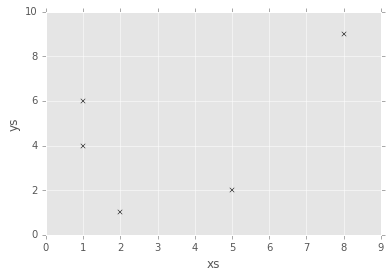

In [156]:
df7.plot.scatter("xs", "ys", color = "black", marker = "x")

57.Columns in your DataFrame can also be used to modify colors and sizes. Bill has been keeping track of his performance at work over time, as well as how good he was feeling that day, and whether he had a cup of coffee in the morning. Make a plot which incorporates all four features of this DataFrame.

(Hint: If you're having trouble seeing the plot, try multiplying the Series which you choose to represent size by 10 or more)

The chart doesn't have to be pretty: this isn't a course in data viz!

df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})

In [157]:
df8 = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})

df8

,caffienated,happiness,hours_in,productivity
0,0,2,1,5
1,0,1,9,2
2,1,3,6,3
3,1,2,5,1
4,0,3,3,4
5,0,1,9,5
6,0,2,2,6
7,0,3,9,7
8,1,1,1,8
9,1,2,7,3


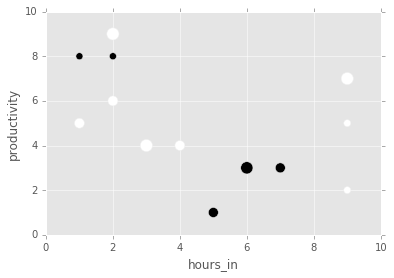

In [166]:
df8.plot.scatter("hours_in", "productivity",  s = df8.happiness * 50, c = df8.caffienated   )

58.What if we want to plot multiple things? Pandas allows you to pass in a matplotlib Axis object for plots, and plots will also return an Axis object.

Make a bar plot of monthly revenue with a line plot of monthly advertising spending (numbers in millions)

df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })

In [167]:
df9 = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })
df9


,advertising,month,revenue
0,2.1,0,57
1,1.9,1,68
2,2.7,2,63
3,3.0,3,71
4,3.6,4,72
5,3.2,5,90
6,2.7,6,80
7,2.4,7,62
8,1.8,8,59
9,1.6,9,51


(-1, 12)

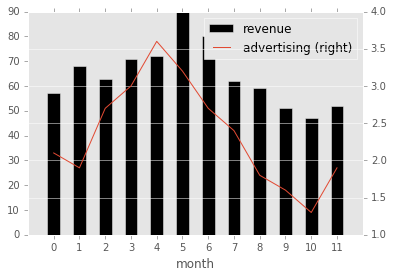

In [175]:
ax = df9.plot.bar("month", "revenue", color = (0,0,0))
df9.plot.line("month", "advertising", secondary_y = True, ax = ax)
ax.set_xlim((-1,12))

59.Generate a day's worth of random stock data, and aggregate / reformat it so that it has hourly summaries of the opening, highest, lowest, and closing prices

In [192]:
import numpy as np
def float_to_time(x):
    return str(int(x)) + ":" + str(int(x%1 * 60)).zfill(2) + ":" + str(int(x*60 % 1 * 60)).zfill(2)

def day_stock_data():
    #NYSE is open from 9:30 to 4:00
    time = 9.5
    price = 100
    results = [(float_to_time(time), price)]
    while time < 16:
        elapsed = np.random.exponential(.001)
        time += elapsed
        if time > 16:
            break
        price_diff = np.random.uniform(.999, 1.001)
        price *= price_diff
        results.append((float_to_time(time), price))
    
    
    df = pd.DataFrame(results, columns = ['time','price'])
    df.time = pd.to_datetime(df.time)
    return df

def plot_candlestick(agg):
    fig, ax = plt.subplots()
    for time in agg.index:
        ax.plot([time.hour] * 2, agg.loc[time, ["high","low"]].values, color = "black")
        ax.plot([time.hour] * 2, agg.loc[time, ["open","close"]].values, color = agg.loc[time, "color"], linewidth = 10)

    ax.set_xlim((8,16))
    ax.set_ylabel("Price")
    ax.set_xlabel("Hour")
    ax.set_title("OHLC of Stock Value During Trading Day")
    plt.show()

In [193]:
df = day_stock_data()
df.head()



,time,price
0,2018-05-27 09:30:00,100.000000
1,2018-05-27 09:30:05,99.995206
2,2018-05-27 09:30:07,100.069408
3,2018-05-27 09:30:12,100.132648
4,2018-05-27 09:30:15,100.231567


In [194]:
df.set_index("time", inplace = True)
agg= df.resample("H").sum()
agg

price    697.530654
dtype: float64